In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/python/vgames2.csv' # 데이터셋 설정
df = pd.read_csv(filename)
df = df.drop(['Unnamed: 0'], axis = 1 )
df = df.fillna(0) # 결측치제거
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [242]:
df.isnull().sum() # 결측치 확인

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [243]:
df.dtypes # 데이터 타입 확인

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [244]:
def delete_KM(a) :          # 숫자 데이터에 있는 단위 'K', 'M' 지우는 함수 설정
  if 'K' in a :
    a = a.replace('K', '')
    return float(a) / 1000
  elif 'M' in a :
    a = a.replace('M', '')
    return float(a)
  return a

def plus_year(a) : # year 열 두자리 값 네자리값으로 변경하는 함수 선언(ex. 15 -> 2015)
  if a < 30 :
    a = a + 2000
    return float(a)
  elif 30 <= a < 100 :
    a = a + 1900
    return float(a)
  return a

df['NA_Sales'] = df['NA_Sales'].apply(delete_KM)
df['EU_Sales'] = df['EU_Sales'].apply(delete_KM)
df['JP_Sales'] = df['JP_Sales'].apply(delete_KM)
df['Other_Sales'] = df['Other_Sales'].apply(delete_KM)
df['Year'] = df['Year'].apply(plus_year)

In [245]:
df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].apply(pd.to_numeric) # 지역별 판매량 float 형으로 전환
df.dtypes # 데이터 타입 확인

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [259]:
df_genre = df['Genre'].unique() # 장르 종류
df_genre = list(df_genre)
df_genre.remove(0)
print(df_genre)
print('-------------------------')
print(df['Genre'].value_counts()) # 장르 종류별 갯수

['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation', 'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter']
-------------------------
Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
0                 50
Name: Genre, dtype: int64


In [260]:
df_genre_Action = df.where(df['Genre']=='Action') # 장르별 판매량 집계
df_genre_Action= df_genre_Action.dropna()

df_genre_Sports = df.where(df['Genre']=='Sports')
df_genre_Sports= df_genre_Sports.dropna()

df_genre_Misc = df.where(df['Genre']=='Misc')
df_genre_Misc= df_genre_Misc.dropna()

df_genre_RolePlaying = df.where(df['Genre']=='Role-Playing')
df_genre_RolePlaying= df_genre_RolePlaying.dropna()

df_genre_Shooter  = df.where(df['Genre']=='Shooter')
df_genre_Shooter = df_genre_Shooter .dropna()

df_genre_Adventure  = df.where(df['Genre']=='Adventure')
df_genre_Adventure = df_genre_Adventure.dropna()

df_genre_Racing = df.where(df['Genre']=='Racing')
df_genre_Racing = df_genre_Racing.dropna()

df_genre_Platform = df.where(df['Genre']=='Platform')
df_genre_Platform = df_genre_Platform.dropna()

df_genre_Simulation  = df.where(df['Genre']=='Simulation')
df_genre_Simulation = df_genre_Simulation.dropna()

df_genre_Fighting  = df.where(df['Genre']=='Fighting')
df_genre_Fighting = df_genre_Fighting.dropna()

df_genre_Strategy  = df.where(df['Genre']=='Strategy')
df_genre_Strategy = df_genre_Strategy.dropna()

df_genre_Puzzle  = df.where(df['Genre']=='Puzzle')
df_genre_Puzzle  = df_genre_Puzzle.dropna()

In [261]:
Action_NA = df_genre_Action['NA_Sales'].sum()      # 각 장르별 NA 지역 판매량의 총 합
Sports_NA = df_genre_Sports['NA_Sales'].sum()
Misc_NA = df_genre_Misc['NA_Sales'].sum()
RolePlaying_NA = df_genre_RolePlaying['NA_Sales'].sum()
Shooter_NA = df_genre_Shooter['NA_Sales'].sum()
Adventure_NA = df_genre_Adventure['NA_Sales'].sum()
Racing_NA = df_genre_Racing['NA_Sales'].sum()
Platform_NA = df_genre_Platform['NA_Sales'].sum()
Simulation_NA = df_genre_Simulation['NA_Sales'].sum()
Fighting_NA = df_genre_Fighting['NA_Sales'].sum()
Strategy_NA = df_genre_Strategy['NA_Sales'].sum()
Puzzle_NA = df_genre_Puzzle['NA_Sales'].sum()

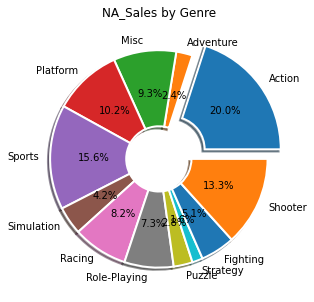

In [524]:
df_area_NA = [Action_NA, Adventure_NA, Misc_NA, Platform_NA, Sports_NA, Simulation_NA, Racing_NA, RolePlaying_NA, Puzzle_NA, Strategy_NA, Fighting_NA, Shooter_NA]
df_area_NA = pd.Series(df_area_NA, index = df_genre)
explode_NA = [0.15,0,0,0,0,0,0,0,0,0,0,0] # 제일 판매량이 큰 Action 장르 강조(부채꼴 튀어나오기)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2} # 부채꼴 스타일 지정

plt.pie(df_area_NA, labels = df_genre, autopct='%.1f%%', explode = explode_NA, wedgeprops = wedgeprops, shadow = True) # NA 지역 장르별 게임 판매량 파이 차트
plt.title('NA_Sales by Genre')
plt.rcParams['figure.figsize'] = 15,10
plt.show()

In [263]:
Action_EU = df_genre_Action['EU_Sales'].sum()      # 각 장르별 EU 지역 판매량의 총 합
Sports_EU = df_genre_Sports['EU_Sales'].sum()
Misc_EU = df_genre_Misc['EU_Sales'].sum()
RolePlaying_EU = df_genre_RolePlaying['EU_Sales'].sum()
Shooter_EU = df_genre_Shooter['EU_Sales'].sum()
Adventure_EU = df_genre_Adventure['EU_Sales'].sum()
Racing_EU = df_genre_Racing['EU_Sales'].sum()
Platform_EU = df_genre_Platform['EU_Sales'].sum()
Simulation_EU = df_genre_Simulation['EU_Sales'].sum()
Fighting_EU = df_genre_Fighting['EU_Sales'].sum()
Strategy_EU = df_genre_Strategy['EU_Sales'].sum()
Puzzle_EU = df_genre_Puzzle['EU_Sales'].sum()

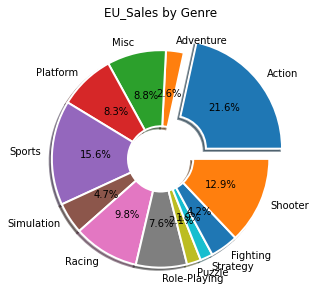

In [387]:
df_area_EU = [Action_EU, Adventure_EU, Misc_EU, Platform_EU, Sports_EU, Simulation_EU, Racing_EU, RolePlaying_EU, Puzzle_EU, Strategy_EU, Fighting_EU, Shooter_EU]
df_area_EU = pd.Series(df_area_EU, index = df_genre)
explode_EU = [0.15,0,0,0,0,0,0,0,0,0,0,0] # 제일 판매량이 큰 Action 장르 강조(부채꼴 튀어나오기)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2} # 부채꼴 스타일 지정

plt.pie(df_area_EU, labels = df_genre, autopct='%.1f%%', explode = explode_EU, wedgeprops = wedgeprops, shadow = True) # EU 지역 장르별 게임 판매량 파이 차트
plt.title('EU_Sales by Genre')
plt.rcParams['figure.figsize'] = 10,5
plt.show()

In [265]:
Action_JP = df_genre_Action['JP_Sales'].sum()      # 각 장르별 JP 지역 판매량의 총 합
Sports_JP = df_genre_Sports['JP_Sales'].sum()
Misc_JP = df_genre_Misc['JP_Sales'].sum()
RolePlaying_JP = df_genre_RolePlaying['JP_Sales'].sum()
Shooter_JP = df_genre_Shooter['JP_Sales'].sum()
Adventure_JP = df_genre_Adventure['JP_Sales'].sum()
Racing_JP = df_genre_Racing['JP_Sales'].sum()
Platform_JP = df_genre_Platform['JP_Sales'].sum()
Simulation_JP = df_genre_Simulation['JP_Sales'].sum()
Fighting_JP = df_genre_Fighting['JP_Sales'].sum()
Strategy_JP = df_genre_Strategy['JP_Sales'].sum()
Puzzle_JP = df_genre_Puzzle['JP_Sales'].sum()

In [388]:
df_genre

['Action',
 'Adventure',
 'Misc',
 'Platform',
 'Sports',
 'Simulation',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Strategy',
 'Fighting',
 'Shooter']

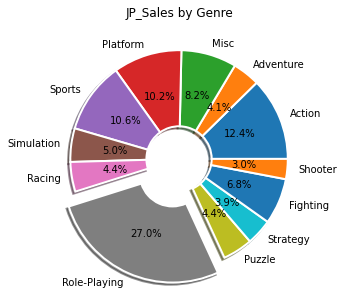

In [391]:
df_area_JP = [Action_JP, Adventure_JP, Misc_JP, Platform_JP, Sports_JP, Simulation_JP, Racing_JP, RolePlaying_JP, Puzzle_JP, Strategy_JP, Fighting_JP, Shooter_JP]
df_area_JP = pd.Series(df_area_JP, index = df_genre)
explode_JP = [0.0,0,0,0,0,0,0,0.15,0,0,0,0] # 제일 판매량이 큰 RolePlaying 장르 강조(부채꼴 튀어나오기)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2} # 부채꼴 스타일 지정

plt.pie(df_area_JP, labels = df_genre, autopct='%.1f%%', explode = explode_JP, wedgeprops = wedgeprops,shadow = True) # JP 지역 장르별 게임 판매량 파이 차트
plt.title('JP_Sales by Genre')
plt.show()

In [267]:
Action_Other = df_genre_Action['Other_Sales'].sum()      # 각 장르별 Other 지역 판매량의 총 합
Sports_Other = df_genre_Sports['Other_Sales'].sum()
Misc_Other = df_genre_Misc['Other_Sales'].sum()
RolePlaying_Other = df_genre_RolePlaying['Other_Sales'].sum()
Shooter_Other = df_genre_Shooter['Other_Sales'].sum()
Adventure_Other = df_genre_Adventure['Other_Sales'].sum()
Racing_Other = df_genre_Racing['Other_Sales'].sum()
Platform_Other = df_genre_Platform['Other_Sales'].sum()
Simulation_Other = df_genre_Simulation['Other_Sales'].sum()
Fighting_Other = df_genre_Fighting['Other_Sales'].sum()
Strategy_Other = df_genre_Strategy['Other_Sales'].sum()
Puzzle_Other = df_genre_Puzzle['Other_Sales'].sum()

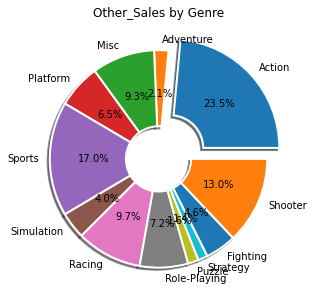

In [392]:
df_area_Other = [Action_Other, Adventure_Other, Misc_Other, Platform_Other, Sports_Other, Simulation_Other, Racing_Other, RolePlaying_Other, 
                 Puzzle_Other, Strategy_Other, Fighting_Other, Shooter_Other]
df_area_Other = pd.Series(df_area_Other, index = df_genre)
explode_Other = [0.15,0,0,0,0,0,0,0,0,0,0,0] # 제일 판매량이 큰 Action 장르 강조(부채꼴 튀어나오기)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2} # 부채꼴 스타일 지정

plt.pie(df_area_Other, labels = df_genre, autopct='%.1f%%', explode = explode_Other, wedgeprops = wedgeprops, shadow = True) # JP 지역 장르별 게임 판매량 파이 차트
plt.title('Other_Sales by Genre')
plt.show()

In [269]:
df_year = df['Year'].unique() # 데이터 연도 리스트
df_year.sort() # 내림차순 정렬
df_year

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

In [343]:
df_year_Action = df_genre_Action.groupby(['Year']).size()  #  각 장르별 연도별 총 판매량
df_year_Action = pd.DataFrame(df_year_Action)
df_year_Action.reset_index()
df_year_Action = df_year_Action[0].values.tolist() # 리스트 변환
df_year_Action.append(0) # 누락된 년도 0으로 추가 # plot 그래프 x축 y축 숫자 맞추기 위해서

df_year_Sports = df_genre_Sports.groupby(['Year']).size()
df_year_Sports = pd.DataFrame(df_year_Sports)
df_year_Sports.reset_index()
df_year_Sports = df_year_Sports[0].values.tolist()
df_year_Sports.extend([0,0,0])

df_year_Misc = df_genre_Misc.groupby(['Year']).size()
df_year_Misc = pd.DataFrame(df_year_Misc)
df_year_Misc.reset_index()
df_year_Misc = df_year_Misc[0].values.tolist()
df_year_Misc.insert(1,0)
df_year_Misc.insert(5,0)
df_year_Misc.insert(5,0)
df_year_Misc.insert(5,0)
df_year_Misc.insert(5,0)
df_year_Misc.insert(10,0)
df_year_Misc.extend([0,0])

df_year_RolePlaying = df_genre_RolePlaying.groupby(['Year']).size()
df_year_RolePlaying = pd.DataFrame(df_year_RolePlaying)
df_year_RolePlaying.reset_index()
df_year_RolePlaying = df_year_RolePlaying[0].values.tolist()
df_year_RolePlaying = [0,0,0,0,0,0] + df_year_RolePlaying
df_year_RolePlaying.extend([0])

df_year_Shooter = df_genre_Shooter.groupby(['Year']).size()
df_year_Shooter = pd.DataFrame(df_year_Shooter)
df_year_Shooter.reset_index()
df_year_Shooter = df_year_Shooter[0].values.tolist()
df_year_Shooter.insert(10,0)
df_year_Shooter.append(0)
df_year_Shooter.append(0)

df_year_Adventure = df_genre_Adventure.groupby(['Year']).size()
df_year_Adventure = pd.DataFrame(df_year_Adventure)
df_year_Adventure.reset_index()
df_year_Adventure = df_year_Adventure[0].values.tolist()
df_year_Adventure = [0,0,0] + df_year_Adventure
df_year_Adventure.insert(4,0)
df_year_Adventure.insert(4,0)
df_year_Adventure.insert(4,0)
df_year_Adventure.insert(8,0)
df_year_Adventure.insert(8,0)
df_year_Adventure.insert(8,0)
df_year_Adventure.append(0)
df_year_Adventure.append(0)

df_year_Racing = df_genre_Racing.groupby(['Year']).size()
df_year_Racing = pd.DataFrame(df_year_Racing)
df_year_Racing.reset_index()
df_year_Racing = df_year_Racing[0].values.tolist()
df_year_Racing.insert(0,0)
df_year_Racing.insert(3,0)
df_year_Racing.insert(5,0)
df_year_Racing.insert(7,0)
df_year_Racing.insert(9,0)
df_year_Racing.append(0)
df_year_Racing.append(0)

df_year_Platform = df_genre_Platform.groupby(['Year']).size()
df_year_Platform = pd.DataFrame(df_year_Platform)
df_year_Platform.reset_index()
df_year_Platform = df_year_Platform[0].values.tolist()
df_year_Platform.insert(0,0)
df_year_Platform.append(0)
df_year_Platform.append(0)

df_year_Simulation = df_genre_Simulation.groupby(['Year']).size()
df_year_Simulation = pd.DataFrame(df_year_Simulation)
df_year_Simulation.reset_index()
df_year_Simulation = df_year_Simulation[0].values.tolist()
df_year_Simulation.insert(0,0)
df_year_Simulation.insert(2,0)
df_year_Simulation.insert(2,0)
df_year_Simulation.insert(2,0)
df_year_Simulation.insert(6,0)
df_year_Simulation.insert(6,0)
df_year_Simulation.insert(9,0)
df_year_Simulation.insert(37,0)

df_year_Fighting = df_genre_Fighting.groupby(['Year']).size()
df_year_Fighting = pd.DataFrame(df_year_Fighting)
df_year_Fighting.reset_index()
df_year_Fighting = df_year_Fighting[0].values.tolist()
df_year_Fighting.insert(1,0)
df_year_Fighting.insert(1,0)
df_year_Fighting.insert(1,0)
df_year_Fighting.insert(1,0)
df_year_Fighting.insert(6,0)
df_year_Fighting.insert(8,0)
df_year_Fighting.insert(8,0)
df_year_Fighting.insert(8,0)
df_year_Fighting.append(0)
df_year_Fighting.append(0)

df_year_Strategy = df_genre_Strategy.groupby(['Year']).size()
df_year_Strategy = pd.DataFrame(df_year_Strategy)
df_year_Strategy.reset_index()
df_year_Strategy = df_year_Strategy[0].values.tolist()
df_year_Strategy = [0,0,0,0,0,0,0,0,0,0,0] + df_year_Strategy
df_year_Strategy.append(0)
df_year_Strategy.append(0)

df_year_Puzzle = df_genre_Puzzle.groupby(['Year']).size()
df_year_Puzzle = pd.DataFrame(df_year_Puzzle)
df_year_Puzzle.reset_index()
df_year_Puzzle = df_year_Puzzle[0].values.tolist()
df_year_Puzzle.insert(0,0)
df_year_Puzzle.insert(6,0)
df_year_Puzzle.insert(6,0)
df_year_Puzzle.append(0)
df_year_Puzzle.append(0)
df_year_Puzzle.append(0)


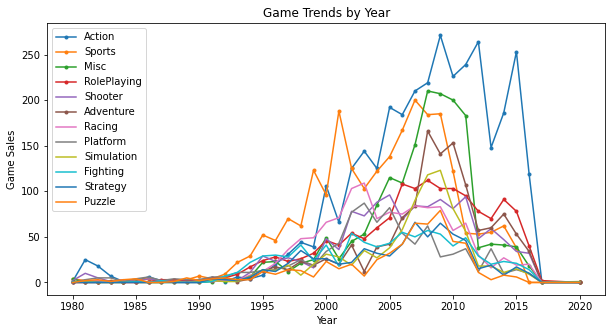

In [393]:
trend_legend = ['Action', 'Sports', 'Misc', 'RolePlaying','Shooter','Adventure','Racing','Platform', 'Simulation', 'Fighting', 'Strategy','Puzzle']

plt.plot(df_year, df_year_Action,marker='o',markersize=3)
plt.plot(df_year, df_year_Sports,marker='o',markersize=3)
plt.plot(df_year, df_year_Misc,marker='o',markersize=3)
plt.plot(df_year, df_year_RolePlaying,marker='o',markersize=3)
plt.plot(df_year, df_year_Shooter)
plt.plot(df_year, df_year_Adventure,marker='o',markersize=3)
plt.plot(df_year, df_year_Racing)
plt.plot(df_year, df_year_Platform)
plt.plot(df_year, df_year_Simulation)
plt.plot(df_year, df_year_Fighting)
plt.plot(df_year, df_year_Strategy)
plt.plot(df_year, df_year_Puzzle)
plt.legend(trend_legend)
plt.title('Game Trends by Year')
plt.xlabel('Year')
plt.ylabel('Game Sales')
plt.rcParams['figure.figsize'] = 5,3
plt.show()

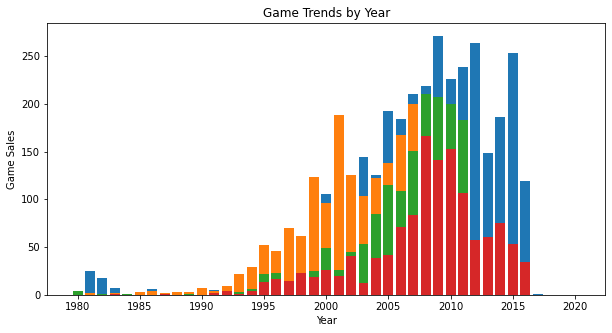

In [378]:
plt.bar(df_year,df_year_Action)
plt.bar(df_year,df_year_Sports)
plt.bar(df_year,df_year_Misc)
plt.bar(df_year,df_year_Adventure)
plt.title('Game Trends by Year')
plt.xlabel('Year')
plt.ylabel('Game Sales')
plt.rcParams['figure.figsize'] = 5,3
plt.show()

In [509]:
df['Name'].unique()
df1= df
df2 = df1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df1['Total_Sales'] = df2.sum(axis=1)
df1 = df1.sort_values('Total_Sales',ascending=False)
dfa = df1.head(20)
dfa = dfa.reset_index()
dfa

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [510]:
dfa_publisher = dfa['Publisher'].unique() # 판매량 상위 20 게임사
dfa_publisher

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive'],
      dtype=object)

In [511]:
nintendo = dfa.where(dfa['Publisher'] == 'Nintendo')  # 판매량 상위 20 게임사 판매량
nintendo = nintendo.dropna()
nintendo_sum = nintendo['Total_Sales'].sum()

Microsoft = dfa.where(dfa['Publisher'] == 'Microsoft Game Studios')
Microsoft = Microsoft.dropna()
Microsoft_sum = Microsoft['Total_Sales'].sum()

TakeTwo = dfa.where(dfa['Publisher'] == 'Take-Two Interactive')
TakeTwo = TakeTwo.dropna()
TakeTwo_sum = TakeTwo['Total_Sales'].sum()

nintendo_sum

526.22

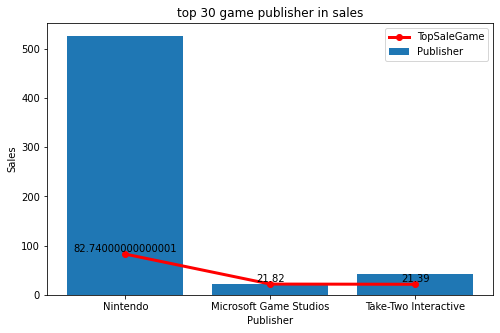

In [523]:
publisher_sum = [nintendo_sum,Microsoft_sum,TakeTwo_sum] # 게임 판매량 상위 20개 게임의 게임사 각 총 판매량
topgame_publisher = [nintendo.loc[0,'Total_Sales'],dfa.loc[15,'Total_Sales'],dfa.loc[16,'Total_Sales']]

plt.bar(dfa_publisher,publisher_sum)  # x축 = 게임사 상위 3개, y축 = 게임사의 게임 총 판매량

plt.plot(dfa_publisher ,topgame_publisher, marker = 'o', linewidth = 3, color = 'red')

plt.title('top 30 game publisher in sales')
plt.legend(['TopSaleGame','Publisher'])
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.rcParams['figure.figsize'] = 8,5

for i,v in enumerate(dfa_publisher):  # 그래프에 숫자 표시 
  plt.text(v, topgame_publisher[i], topgame_publisher[i],
           fontsize = 10, color='black', horizontalalignment='center',verticalalignment='bottom')
plt.show()

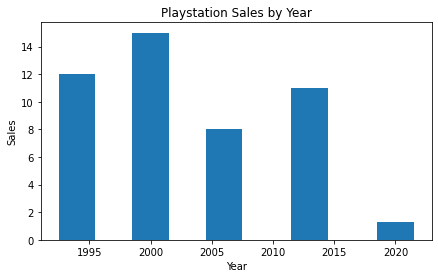

In [529]:
playstation_year = [1994,2000,2006,2013,2020] # 플레이스테이션 판매 년도
playstation_sale = [12,15,8,11,1.3] # 플레이스테이션 판매량(단위 : 1000만대 기준)

plt.bar(playstation_year, playstation_sale, width = 3)
plt.title('Playstation Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.rcParams['figure.figsize'] = 7,4
plt.show()